# Luonnollisten kielten käsittelyä YouTube-kommenteilla
### Antti Luopajärvi

In [1]:
# preprocessing
from sklearn import preprocessing

# iteration operations
import itertools

# nlp
import langdetect

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# word cloud
from wordcloud import WordCloud
# visualization
import matplotlib.pyplot as plt

# algebra
import numpy as np

# dataframing
import pandas as pd

In [2]:
data = pd.read_csv("./data/youtube_dataset.csv")

## 1. Datasta

 - Data koskee **YouTube-kommentteja**. Se sisältää mm. videon nimen johon kommentti oli kirjoitettu, videon kanavan nimen, päivämäärän, kommentin tykkäysten lukumäärän jne.
 - Kaikenkaikkiaan, datassa on 7 piirrettä (saraketta) ja 19300 instanssia (riviä).
 - Data on ladattu osoitteesta https://www.kaggle.com/nipunarora8/most-liked-comments-on-youtube

## 2. Datan tarkastelu

In [3]:
data.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [4]:
data.sample(frac = 1)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
15628,"Shawn Mendes, Camila Cabello - Señorita",ShawnMendesVEVO,UgwtLK6nbkCkzNEBd0V4AaABAg,Yianno Pantermakis,I don’t think this song is about them being fr...,2020-09-04T08:24:35Z,246
12340,TONES AND I - DANCE MONKEY (OFFICIAL VIDEO),Tones And I,Ugx1wogzDmmAFaRRn-N4AaABAg,Sofia Jaimes,Si viniste a ver los comentarios y crees que n...,2020-02-01T02:09:57Z,596
12638,Post Malone - Congratulations ft. Quavo,PostMaloneVEVO,UgzpC0SztjjPDKL7NBN4AaABAg,100K Subscribers With 1 FUNNY Video Challenge,Let's take time to appreciate the fact that Ti...,2020-08-26T22:07:11Z,179
15600,"Shawn Mendes, Camila Cabello - Señorita",ShawnMendesVEVO,Ugy8Q0JFrCp71eh68Rt4AaABAg,Tudtad-e Hungary,Comments:\n\n99% about Shawn and Camila relati...,2019-06-21T07:17:41Z,1044
14530,James Arthur - Say You Won&#39;t Let Go,JamesAVEVO,UgzASRJRpOe0hiectrV4AaABAg,Simply Human,Anyone that feels bad about their appearance r...,2020-08-19T21:20:17Z,218
...,...,...,...,...,...,...,...
7245,"ROSALÍA, J Balvin - Con Altura (Official Video...",RosaliaVEVO,Ugz_nuWNwKMrAu81gEV4AaABAg,Y Bary,Esta canción tiene algo que no puedo dejar de ...,2019-05-01T18:43:34Z,15437
4488,Bruno Mars - The Lazy Song (Official Video),Bruno Mars,UgwOyVqrjwFe0-vJ-Ed4AaABAg,Help me 50k subscribers without any video Chal...,*Whoever is here During September 2020 is too ...,2020-09-06T16:57:48Z,1
13909,One Direction - What Makes You Beautiful (Offi...,OneDirectionVEVO,UgxBT0uOtKWogw4fDP14AaABAg,AZ Folger,"Hello Dear Directioners\nHarry Styles, Niall H...",2020-05-21T18:46:35Z,8131
18164,twenty one pilots - Ride (Official Video),twenty one pilots,UgxNua_y11rpUJdgdw54AaABAg,Ismail Hussein,WHY ISN'T THIS AT A BILLION VIEWS YET\n\n\nFin...,2020-07-27T13:37:33Z,1481


In [5]:
# most liked comments
data.sort_values("Likes",ascending=False)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
5201,Marshmello - Alone (Official Music Video),Marshmello,UgypW6-bk7J6JZJF1954AaABAg,Marshmello,"1,000,000,000 ✅",2018-10-15T19:33:03Z,540334
15805,Eminem - Rap God (Explicit) [Official Video],EminemVEVO,UgjtQw8E3CESxngCoAEC,Goldenightime,Eminem raps faster than my internet connection,2016-08-13T02:15:49Z,438973
5,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3120,Justin Bieber - Baby (Official Music Video) ft...,JustinBieberVEVO,Ugzv_LcinEv-IMMQZZN4AaABAg,Siddhant Dubey,There's 4.6M comments if you find mine then y...,2019-07-20T06:46:38Z,350917
...,...,...,...,...,...,...,...
11089,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugyndg3MQJbNCdEGZHF4AaABAg,Josthin Cobeña,ME RIO DEL MIEDO,2020-06-28T18:34:13Z,0
11090,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugz3Wy-qB08sAmy3zqV4AaABAg,Yisela Chaves,this song is beautiful,2020-06-23T22:36:37Z,0
4393,Shawn Mendes - Treat You Better,ShawnMendesVEVO,UgzScCcK6uBP92JF6yl4AaABAg,UwU,I make vid using this song and send this to my...,2020-09-08T12:21:43Z,0
11091,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,UgzZnAQdvpSS7knETiR4AaABAg,Hades Uwu,2017 el mejor año por ahora 🔥,2020-08-18T19:26:01Z,0


In [6]:
data['Likes'].describe()

count     19300.000000
mean       2142.412642
std       11795.954843
min           0.000000
25%           2.000000
50%          22.000000
75%         260.000000
max      540334.000000
Name: Likes, dtype: float64

Nähdään että mediaaniarvo tykkäyksille on 22. Kuitenkin, keskiarvo on 2140 ja keskihajonta suuri - lähes 12000. Tykkäysten määrä vaihtelee 0 ja 540334 välillä.

## 3. Menetelmän esittely:

 1. Esiprosessoidaan data. 
 2. Tutkitaan tekstinkäsittelytyökaluja. 
 - Kielen tunnistaminen.
 - Sanojen erottelu, välimerkkien, täytesanojen käsittely.
 - Yleisimmät sanat.
 3. Bag of Words- prosessi
 - Luodaan termi-dokumentti matriisit kahdella eri metodilla.
 4. Sovitetaan kaksi eri regressiomallia dataan ja ennustetaan kommentin saamien tykkäysten lukumäärää kommentin sisällöllä.
 5. Tarkastellaan tuloksia.

## 4. Esiprosessointi

### 1. Duplikaatit

In [7]:
# check for duplicates
data['Comment Id'].value_counts()[:10]

UgwBLwnjmdlK-JFI43J4AaABAg    2
UgjmCnWTF9oC2XgCoAEC          2
UgyQFHzA1fJ-x0KAVSN4AaABAg    2
Ugw8GtYyDF0iFe9ltnB4AaABAg    2
UgymTg2cW44cPQfXBh14AaABAg    2
UgyAYwfD-eA8zvLEgFR4AaABAg    2
UgzHdwHoBDcvPqfU9a54AaABAg    2
UgzuhwJEjuC-b3lQ8vF4AaABAg    2
Ugy05wsVThOVm90kYkh4AaABAg    2
UgzkcLZyGvv5YKYo38Z4AaABAg    2
Name: Comment Id, dtype: int64

In [8]:
# remove duplicates
data.drop_duplicates(['Comment Id'], keep='first', inplace=True)

In [9]:
# check result
data['Comment Id'].value_counts()[:10]

UgyUQgxurtm25_SF3Lt4AaABAg    1
UgzeLMGgCZIyq8-1vup4AaABAg    1
UgwTHPDxufmv8KaRKEB4AaABAg    1
UgwmtqUM7nNUY0nmVi94AaABAg    1
Ugzyg5J_SIyfXvtOyhR4AaABAg    1
UgzpD1Or2Z643hw5kvJ4AaABAg    1
UgyLAPqqTCwtOc8DaUZ4AaABAg    1
UgwvU6VOjQ5NZVVrxAt4AaABAg    1
UgzdR5TAutvNCMXhdYN4AaABAg    1
UgxAbOsg5NvtlvZDuWJ4AaABAg    1
Name: Comment Id, dtype: int64

### 2. Kielen tunnistaminen

Ongelma: Kommentit on kirjoitettu monella eri kielellä. Myöhemmin kun yritämme sovitamme mallia dataan, eri kielet saattavat aiheuttaa ongelmia. Esimerkiksi japanin ja korean kielissä ei kirjoiteta välilyöntejä. Sanojen eroittelu on siten vaikeaa samoin keinoin kuin esimerkiksi englannin kanssa.

Joten, yritetään tunnistaa kommenttien kieli käyttäen olemassa olevia työkaluja.

Käytetään kirjastoa nimeltä **langdetect**, jossa on tuki 55 eri kielelle. Se ei ole täydellinen, ja erityisesti lyhyet/yhden sanan virkkeet ovat sille ongelmallisia. Myös, meillä ei ole pohjatotuuksia kielelle käytössä, mutta kokeillaan ottaa satunnainen otos tuloksista ja tarkastellaan manuaalisesti miten hyvin kirjasto onnistuu tehtävässä.

In [10]:
comments = data.sample(n=100, random_state=1)['Comment'].values
for c in comments:
    print(c)
    try:
        print("Language: ", langdetect.detect(c).upper())
    except:
        pass

Mi novia me dejo por que decía que me gusta mucho el reggaetón 
Pero volverá, para seducirme otra vez, besarme otra vez volverme a poner el mundo al revés. 🤷🏿‍♂️
Language:  ES
Yes Mari and Keone!!!!!!!!!
Language:  EN
jajaja ches mancos yo desde chiquita yo sabía que la morena era la Taylor
Language:  ES
I've counted too many stars, now I'm an astronomer.
Language:  EN
Found out I’m twice this guy’s age but I still can’t help but wanna play it
Language:  EN
WALKERS TOGETHER AND FOREVER 😎😎😎TAKE ME THROUGH THE NIGHT FALL INTO THE DARKSIDE WE DON'T NEED THE LIGHT WERE LIVE ON THE DARK SIDE
Language:  EN
Do you recall, not long ago
We would walk on the sidewalk
Innocent, remember?
All we did was care for each other

But the night was warm
We were bold and young
All around the wind blows
We would only hold on to let go

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss

Tästä satunnaisesta otoksesta nähdään että:
1. Suurin osa kommenteista on englanniksi.
2. Lisäksi, suurin osa kielistä on oikein tunnistettu (havaitsin itse kolme virheellistä).

Englannin kielen dominointi yllä olevassa otoksessa johtaa siihen ettemme voi tarkastella kovin hyvin miten kirjasto suorituu muiden kielien (pl. ehkä espanjan ja portugalin) tunnistamisessa. Otetaan siis varman päälle ja käytetään tästä eteenpäin vain englannin kieliseksi luokiteltuja kommentteja.

In [11]:
def detect_lang(comment: str):
    """
    Embed try / except syntax for detecting languages.
    """
    
    try:
        return langdetect.detect(comment)
    except:
        return comment

# apply detection for each comment
lang = data['Comment'].apply(detect_lang)
data['Language'] = lang

In [12]:
print(lang)
print("Number of English comments:", len(lang[lang=='en']))
print("% of total number of comments: ", (len(lang[lang=='en']) / len(data)) * 100)

0        en
1        en
2        en
3        en
4        en
         ..
19295    en
19296    en
19297    en
19298    en
19299    es
Name: Comment, Length: 19121, dtype: object
Number of English comments: 13211
% of total number of comments:  69.09157470843576


Erotellaan englanninkieliset kommentit.

In [13]:
data_en = data[data['Language'] == 'en'].copy()
data_en.head(20)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Language
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,en
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,en
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,en
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,en
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,en
6,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzPg7VsuRTwJf77jch4AaABAg,lucas tehe12,claim your “here before 7 billion” tickets her...,2020-09-08T06:01:36Z,763,en
7,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,en
8,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzhueoG3QOV4AbAYAt4AaABAg,Guty Castro soda,Song: spanish\nComments: English\nHotel: trivago,2020-09-09T01:17:50Z,150,en
10,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,en
11,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugy-CwNxTeLKUuYOXdF4AaABAg,Pls HeLP Me reach 100 SUBscribers,Just imagine how many people's come here every...,2020-09-09T05:43:47Z,142,en


## 5. Luonnollisten kielten prosessointi (NLP)

Testataan NLP-metodeja dataan.

In [14]:
comments = data_en['Comment']

In [15]:
# cut comments into sentences
sentences = [sent_tokenize(c) for c in comments]

In [16]:
words = [word_tokenize(c) for c in comments]  # cut comments into words
words[0:3]

[['The',
  'people',
  'who',
  'liked',
  'this',
  'comment',
  'is',
  'officially',
  'before',
  '7B',
  'views'],
 ['-', 'Wait', ',', 'it', "'s", '7B', 'views', '-', 'Always', 'has', 'been'],
 ['*',
  'Teacher',
  ':',
  'What',
  'is',
  'the',
  'population',
  'of',
  'the',
  'Earth',
  '?',
  '*',
  '*',
  'Me',
  ':',
  'Around',
  'one',
  'Despacito',
  '*']]

### 1. Yleisimmät sanat

In [17]:
words_all = [w.lower() for w in list(itertools.chain.from_iterable(words)) ] # set words to lowercase and combine all words together into one list.
fdist = FreqDist(words_all)  # count frequencies
fdist.most_common(10)  # list 10 most common words and counts

[(',', 13238),
 ('i', 12302),
 ('the', 9946),
 ('you', 9095),
 ('this', 8004),
 ('.', 7366),
 (':', 7345),
 ('to', 6638),
 ('and', 5621),
 ('a', 5139)]

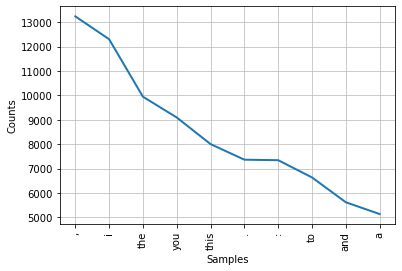

In [18]:
fdist.plot(10)

**Poistetaan välimerkit**

Tiedon hankkimisen kannalta välimerkit eivät ole kovin olennaisia. Poistetaan ne datasta.

In [19]:
words_no_punc = [w for w in words_all if w.isalpha()]

In [20]:
print(len(words_all), len(words_no_punc))

395117 319286


Välimerkit poistettu

In [21]:
fdist = FreqDist(words_no_punc)
fdist.most_common(10)

[('i', 12302),
 ('the', 9946),
 ('you', 9095),
 ('this', 8004),
 ('to', 6638),
 ('and', 5621),
 ('a', 5139),
 ('is', 4319),
 ('in', 4293),
 ('it', 4208)]

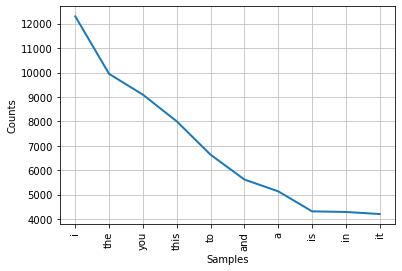

In [22]:
fdist.plot(10)

**Poistetaan täytesanat**

Sanat kuten 'and', 'but' ja 'so' eivät myöskään usein ole kovin informatiivisia kommentin sisällön suhteen. Poistetaan siis nekin.

In [23]:
sw = stopwords.words("english")  # english language stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
words_no_stopwords = [w for w in words_no_punc if w not in sw]  # exlude stopwords
print(len(words_no_punc), len(words_no_stopwords))

319286 164526


**Yleisimmät sanat**

In [25]:
fdist = FreqDist(words_no_stopwords)
fdist.most_common(10)

[('song', 3752),
 ('like', 2523),
 ('love', 1715),
 ('people', 1632),
 ('know', 1568),
 ('oh', 1561),
 ('years', 1407),
 ('rip', 1317),
 ('one', 1280),
 ('still', 1100)]

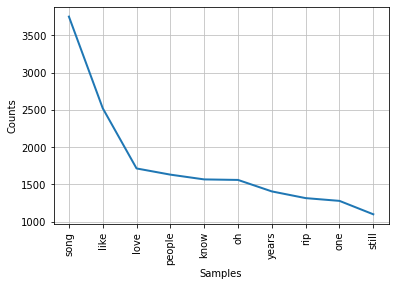

In [26]:
fdist.plot(10)

**WordCloud**

Luodaan WordCloud-kuva visualisoidaksemme yleisimpiä sanoja.

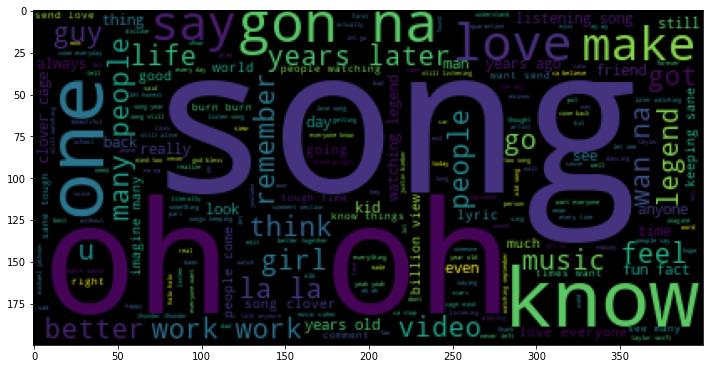

In [27]:
wc = WordCloud().generate(" ".join(words_no_stopwords))
plt.figure(figsize = (12, 12))
plt.imshow(wc)

## 6. Bag of Words

Muutetaan kommenttidata matriisiksi joka sisältää tiedon montako kertaa mikäkin sana ilmestyy kommentissa. Tässä matriisissa 0-akselilla on kommentti ja 1-akselilla sanat.

Tätä prosessia kutsutaan **Bag of Words** (Sanasäkki?) - representaatioksi.

Käytetään tähän **CountVectorizer**-työkalua.

In [28]:
# specify data and target
X = data_en['Comment']
y = data_en['Likes']
print(X.shape)
print(y.shape)

(13211,)
(13211,)


Erotellaan data koulutus- ja testiosioihin.

In [29]:
# split X and y into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(y_test))

(9908,)
(3303,)
(9908,)
(3303,)
<class 'pandas.core.series.Series'>


In [30]:
# import and create an instance of CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [31]:
# learn the "vocabulary" of the train data
vectorizer.fit(X_train)

CountVectorizer()

In [32]:
# words that the vectorizer has "learned" from the comments
feature_names = vectorizer.get_feature_names()

**Huomio: Kuinka tämä eroaa aikaisemmin tehdystä sanojen 'tokenisoinnista'?**

 - Kaikki sanat ovat muutettu pienillä kirjaimilla kirjoitetuiksi.
 - Alle kaksikirjaimiset sanat on jätetty pois.
 - Välimerkit on otettu pois.
 - Duplikaatit on otettu pois.

In [33]:
# transform data into a document-term matrix (aka comment-word matrix)
X_train_dtm = vectorizer.transform(X_train)

# convert the matrix into a dataframe
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,00,000,000001,001,00s,01,010s,016,01b,02,...,안녕히,주무세요,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪,𝗹𝗲𝗴𝗲𝗻𝗱,𝗿𝗲,𝘆𝗼𝘂,𝙱𝚃𝚆,𝙼𝚈,𝙽𝙰𝙼𝙴,𝚁𝙴𝙰𝙳
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# using the fitted vocabulary, transform testing data into document-term matrix
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<3303x10735 sparse matrix of type '<class 'numpy.int64'>'
	with 52679 stored elements in Compressed Sparse Row format>

Toinen samankaltainen työkalu on **TfidfVectorizer**, joka ensin tekee saman kuin CountVectorizer, ja sitten muuntaa dokumentti-termi-matriisin normalisoiduksi frekvenssimatriisiksi. Metodi pyrkii torjumaan esimerkiksi täytesanojen suuresta ilmaantuvuudesta aiheutuvia vaikutuksia. Lyhyesti, se kertoo kuinka relevantti sana on tietyssä kokoelmassa dokumentteja (kommentteja). Ajetaan myös tämä datalle.

In [35]:
# import, create, and fit TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tf = TfidfVectorizer(use_idf=True)
vectorizer_tf.fit(X_train)

TfidfVectorizer()

In [36]:
# transform data into a tf-idf matrix
X_train_dtm_tf = vectorizer_tf.transform(X_train)

# convert the matrix into a dataframe
pd.DataFrame(X_train_dtm_tf.toarray(), columns=vectorizer_tf.get_feature_names())

,00,000,000001,001,00s,01,010s,016,01b,02,...,안녕히,주무세요,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪,𝗹𝗲𝗴𝗲𝗻𝗱,𝗿𝗲,𝘆𝗼𝘂,𝙱𝚃𝚆,𝙼𝚈,𝙽𝙰𝙼𝙴,𝚁𝙴𝙰𝙳
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# using the fitted vocabulary, transform testing data into document-term matrix
X_test_dtm_tf = vectorizer_tf.transform(X_test)
X_test_dtm_tf

<3303x10735 sparse matrix of type '<class 'numpy.float64'>'
	with 52679 stored elements in Compressed Sparse Row format>

In [38]:
# save the vectorized data matrices into a list
vectorized_data = [(X_train_dtm, X_test_dtm), (X_train_dtm_tf, X_test_dtm_tf)]

Nyt meillä on siis kaksi dokumentti-termi-matriisia. Toinen sisältää kommenttien sanojen lukumäärät, ja toinen sanojen suhteellisia lukumääriä koko aineiston suhteen.

## 7. Regressio

Luodaan Päätöspuu-regressiomallit ja sovitetaan ne dataan. Luodaan molemmille matriiseille oma malli. Kokeillaan miten mallit ennustavat testidatan kommenttien tykkäysmääriä. 

In [39]:
# import and create an instance of DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

models = [DecisionTreeRegressor(random_state=1)]*2

In [40]:
# fit the models to data
[model.fit(data[0], y_train) for model, data in zip(models, vectorized_data)]

[DecisionTreeRegressor(random_state=1), DecisionTreeRegressor(random_state=1)]

In [41]:
# predict likes based on comment
predicted_likes = [model.predict(data[1]) for model, data in zip(models, vectorized_data)]

Tarkastellaan nyt kuinka mallit pärjäsivät laskemalla keskimääräinen virhe **ennusteiden** ja **todellisten** tykkäysten määrille testidatalla.

Valitaan tarkastelumittariksi keskimääräinen virhe, mean absolute error.

In [42]:
# import and calculcate mean absolute error between predicted and actual likes
from sklearn.metrics import mean_absolute_error

print("Keskimääräiset virheet: ")
print([mean_absolute_error(y_test, pred) for pred in predicted_likes])

Keskimääräiset virheet: 
[13099.267806323254, 4103.0396403546965]


In [43]:
df = pd.DataFrame({'Target':y_test, 
                   'Predicted Values, CountVectorizer':predicted_likes[0].reshape(-1), 
                   'Predicted Values, TfidfVectorizer':predicted_likes[1].reshape(-1)})
df

,Target,"Predicted Values, CountVectorizer","Predicted Values, TfidfVectorizer"
7172,2,4.0,0.000000
17316,36,1888.0,1888.000000
13369,2,3563.0,3563.000000
2533,174,3789.0,3789.000000
16691,27,4.0,2.000000
...,...,...,...
2374,151,5.5,189.631579
17211,102,14086.0,12592.000000
594,1,17166.0,0.000000
5717,264,3040.0,159.000000


Vertaillaan ennusteiden keskihajontoja

In [44]:
print([np.std(p) for p in predicted_likes])

[32757.60563177207, 11790.072080445658]


Nähdään että keskimääräiset virheet ovat melko suuret.

Visualisoidaan ennusteita ja todellisia arvoja:

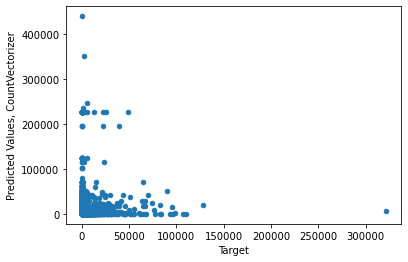

In [45]:
df.reset_index(inplace=True)
df.plot(kind='scatter',x='Target',y='Predicted Values, CountVectorizer')
plt.show()

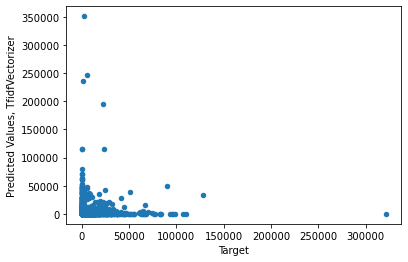

In [46]:
df.plot(kind='scatter',x='Target',y='Predicted Values, TfidfVectorizer')
plt.show()

In [47]:
y_test.describe()

count      3303.000000
mean       2460.215562
std       10750.489300
min           0.000000
25%           2.000000
50%          26.000000
75%         292.000000
max      321690.000000
Name: Likes, dtype: float64

Kokeillaan miten tuloksiin vaikuttaa päätöpuun lehtisolmujen maksimimäärä. Katsotaan siis suorituuko monimutkaisempi malli aina paremmin.

Määritellään funktio joka laskee keskimääräisen virheen eri päätöspuun lehtisolmujen maksimimäärillä:

In [48]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    """
    Fits the Decision Tree Regressor-model to data with different leaf-node amounts. 
    Predicts then the like-counts for test data and calculates mean absolute errors.
    """
    
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    mae = mean_absolute_error(test_y, predictions)
    return predictions, mae

Toistetaan edelliset mallien sovitukset ja ennustetaan tykkäyksien lukumääriä:

Vectorizer: CountVectorizer  		 Max leaf nodes: 5  		 Mean Absolute Error: 3997.4606432169103
Results:
        Target  Predicted likes, CountVectorizer
7172        2                       2354.612121
17316      36                       2354.612121
13369       2                       2354.612121
2533      174                       2354.612121
16691      27                       2354.612121
...       ...                               ...
2374      151                       2354.612121
17211     102                       2354.612121
594         1                       2354.612121
5717      264                       2354.612121
7963        2                       2354.612121

[3303 rows x 2 columns]


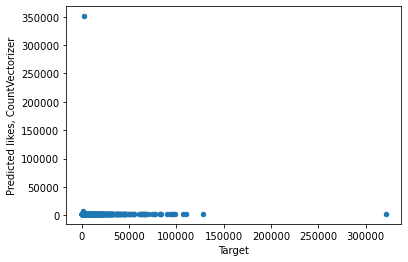

Vectorizer: CountVectorizer  		 Max leaf nodes: 50  		 Mean Absolute Error: 3925.7406103231715
Results:
        Target  Predicted likes, CountVectorizer
7172        2                       1968.533156
17316      36                       1968.533156
13369       2                       1968.533156
2533      174                       1968.533156
16691      27                       1968.533156
...       ...                               ...
2374      151                       1968.533156
17211     102                       1968.533156
594         1                       1968.533156
5717      264                       1968.533156
7963        2                       1968.533156

[3303 rows x 2 columns]


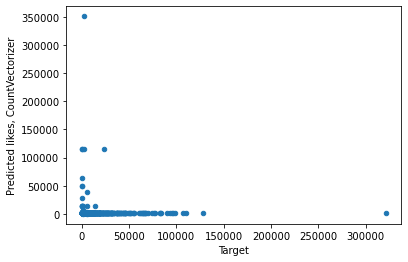

Vectorizer: CountVectorizer  		 Max leaf nodes: 500  		 Mean Absolute Error: 4003.305554577397
Results:
        Target  Predicted likes, CountVectorizer
7172        2                        882.976693
17316      36                        882.976693
13369       2                      22271.000000
2533      174                        882.976693
16691      27                        882.976693
...       ...                               ...
2374      151                        882.976693
17211     102                      13572.000000
594         1                        882.976693
5717      264                        882.976693
7963        2                        882.976693

[3303 rows x 2 columns]


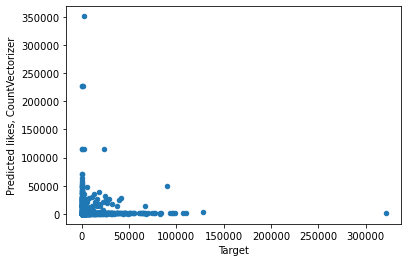

Vectorizer: CountVectorizer  		 Max leaf nodes: 5000  		 Mean Absolute Error: 3898.0364660517253
Results:
        Target  Predicted likes, CountVectorizer
7172        2                         81.000000
17316      36                         53.000000
13369       2                      22271.000000
2533      174                       3789.000000
16691      27                          4.500000
...       ...                               ...
2374      151                        189.631579
17211     102                      12592.000000
594         1                        202.000000
5717      264                        159.000000
7963        2                          2.972973

[3303 rows x 2 columns]


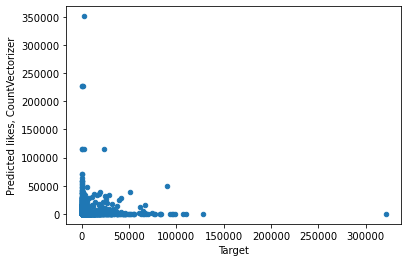

Vectorizer: TfidfVectorizer  		 Max leaf nodes: 5  		 Mean Absolute Error: 4056.5573744092235
Results:
        Target  Predicted likes, TfidfVectorizer
7172        2                       2340.626414
17316      36                       2340.626414
13369       2                       2340.626414
2533      174                       2340.626414
16691      27                       2340.626414
...       ...                               ...
2374      151                       2340.626414
17211     102                       2340.626414
594         1                       2340.626414
5717      264                       2340.626414
7963        2                       2340.626414

[3303 rows x 2 columns]


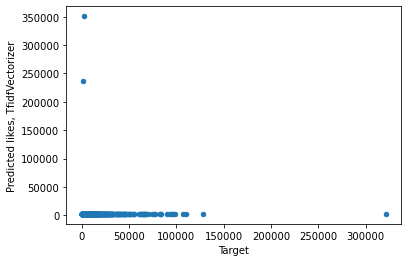

Vectorizer: TfidfVectorizer  		 Max leaf nodes: 50  		 Mean Absolute Error: 4178.166552011643
Results:
        Target  Predicted likes, TfidfVectorizer
7172        2                       1844.690985
17316      36                       1844.690985
13369       2                       1844.690985
2533      174                       1844.690985
16691      27                       1844.690985
...       ...                               ...
2374      151                       1844.690985
17211     102                       1844.690985
594         1                       1844.690985
5717      264                       1844.690985
7963        2                       1844.690985

[3303 rows x 2 columns]


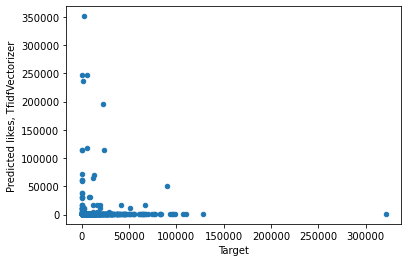

Vectorizer: TfidfVectorizer  		 Max leaf nodes: 500  		 Mean Absolute Error: 4134.5314975230185
Results:
        Target  Predicted likes, TfidfVectorizer
7172        2                        581.053602
17316      36                        581.053602
13369       2                        581.053602
2533      174                        887.566343
16691      27                        581.053602
...       ...                               ...
2374      151                        581.053602
17211     102                      15091.250000
594         1                        581.053602
5717      264                        581.053602
7963        2                        581.053602

[3303 rows x 2 columns]


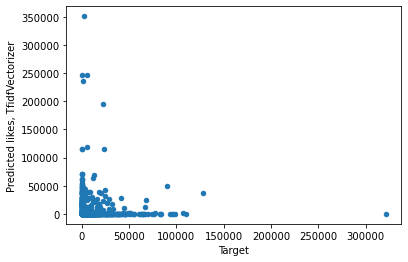

Vectorizer: TfidfVectorizer  		 Max leaf nodes: 5000  		 Mean Absolute Error: 4111.93503808129
Results:
        Target  Predicted likes, TfidfVectorizer
7172        2                          2.066667
17316      36                       1888.000000
13369       2                       3563.000000
2533      174                       3789.000000
16691      27                         41.500000
...       ...                               ...
2374      151                        189.631579
17211     102                      12592.000000
594         1                          1.644172
5717      264                        159.000000
7963        2                          4.000000

[3303 rows x 2 columns]


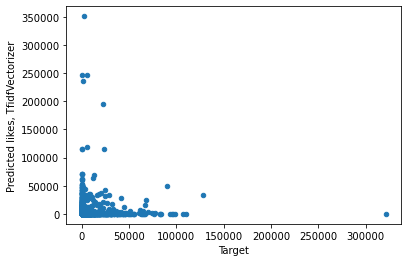

In [49]:
vectorizers = ['CountVectorizer', 'TfidfVectorizer']
for vectorizer, data in zip(vectorizers, vectorized_data):

    # compare mae with differing values of max_leaf_nodes
    for max_leaf_nodes in [5, 50, 500, 5000]:
        predicted_likes, my_mae = get_mae(max_leaf_nodes,data[0], data[1], y_train, y_test)
        msg = "Vectorizer: {}  \t\t Max leaf nodes: {}  \t\t Mean Absolute Error: {}".format(vectorizer, max_leaf_nodes, my_mae)
        print(msg)
        df = pd.DataFrame()
        if isinstance(y_test, pd.Series):
            df['Target'] = pd.Series(y_test)
        else:
            df['Target'] = pd.Series(y_test.reshape(y_test.shape[0],))

        df['Predicted likes, {}'.format(vectorizer)] = predicted_likes
        print("Results:\n", df)
        df.reset_index(inplace=True)
        df.plot(kind='scatter',x='Target',y='Predicted likes, {}'.format(vectorizer))
        plt.show()

Kokeillaan toista regressiomallia. Sovitetaan **Tukivektoriregressio**-malli dataan.

In [50]:
# import, create, and fit Support Vector Regression- models 
from sklearn.svm import SVR
models_svr = [SVR(C=1.0, kernel='rbf')]*2
[model.fit(X_train[0], y_train) for model, X_train in zip(models_svr, vectorized_data)]

[SVR(), SVR()]

In [51]:
# predict likes
svr_pred = [model.predict(X_test[1]) for model, X_test in zip(models_svr, vectorized_data)]

In [52]:
# calculcate mean absolute error for predictions
svr_mae = [mean_absolute_error(y_test, pred) for pred in svr_pred]
print(svr_mae)

[2455.7406121291833, 2454.4216178442794]


In [53]:
df = pd.DataFrame({'Target':y_test, 
                   'Predicted Values, CountVectorizer':svr_pred[0].reshape(-1), 
                   'Predicted Values, TfidfVectorizer':svr_pred[1].reshape(-1)})
df

,Target,"Predicted Values, CountVectorizer","Predicted Values, TfidfVectorizer"
7172,2,26.350881,24.082562
17316,36,26.392646,27.748732
13369,2,26.350791,24.344197
2533,174,26.350944,34.048605
16691,27,26.349178,27.069949
...,...,...,...
2374,151,26.768531,34.899788
17211,102,26.351306,30.026796
594,1,26.350881,26.750760
5717,264,26.351125,34.730419


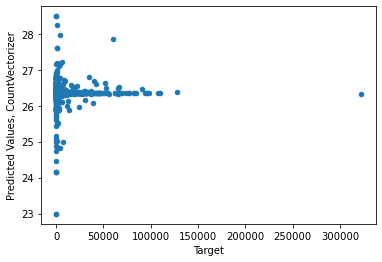

In [54]:
df.reset_index(inplace=True)
df.plot(kind='scatter',x='Target',y='Predicted Values, CountVectorizer')
plt.show()

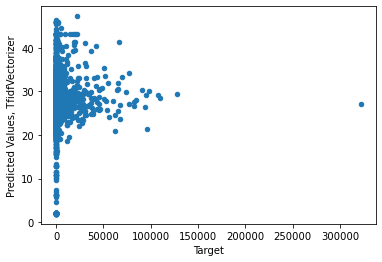

In [55]:
df.reset_index(inplace=True)
df.plot(kind='scatter',x='Target',y='Predicted Values, TfidfVectorizer')
plt.show()

Keskivirhe laski, mutta tuloksista nähdään että varsinkin CountVectorizer-datalla ennustettu määrä on lähes jokaiselle kommentille aika sama.

In [56]:
print([np.std(p) for p in svr_pred])

[0.18096998297563588, 5.572135865323844]


Melko pieni hajonta, vrt. Päätöspuun vastaaviin

## 8. Tuloksista ja toimivuudesta

Tekstinkäsittelytyökaluilla saatiin tietoa datasta, kuten yleisimpiä sanoja. Tykkäysten ennustaminen kommentin sisällöllä ei toimi hyvin, sillä mahdollisesti oleellista dataa oli pudotettu pois, kuten videon nimi, kanava, päivämäärä. Näillä kaikilla piirteillä on luultavasti vaikutus videon katsojamääriin ja siten myös kommenttien tykkäyksiin. Nämä piirteet kuitenkin pudotettiin pois yksinkertaistamisen vuoksi.

Regressiomalleista Tukivektoriregressio antoi pienemmän keskivirheen ennusteille. Kuitenkin, se antoi muutenkin vain pieniä arvoja jokaiselle kommentille kun taas Päätöspuun ennusteissa oli suurempaa vaihtelua.

Seuraavaksi määrällinen muuttuja (tykkäykset) voitaisiin muuttaa kategoriseksi, ja kokeilla luokittelualgoritmeja. Tässäkin haasteita tuo muuttujan arvojen iso vaihteluväli, miten luokat luotaisiin. Dokumentti-termi-matriisien dimensioiden lukumäärää voisi myös pienentää, ja katsoa parantaako se tuloksia.